In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [5]:
#@title Figure settings
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")


In [6]:
# @title Plotting Functions


def plot_weights(models, sharey=True):
    """Draw a stem plot of weights for each model in models dict."""
    n = len(models)
    f = plt.figure(figsize=(10, 2.5 * n))
    axs = f.subplots(n, sharex=True, sharey=sharey)
    axs = np.atleast_1d(axs)

    for ax, (title, model) in zip(axs, models.items()):

        ax.margins(x=0.02)
        stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
        stem[0].set_marker(".")
        stem[0].set_color(".2")
        stem[1].set_linewidths(0.5)
        stem[1].set_color(".2")
        stem[2].set_visible(False)
        ax.axhline(0, color="C3", lw=3)
        ax.set(ylabel="Weight", title=title)
    ax.set(xlabel="Neuron (a.k.a. feature)")
    f.tight_layout()


def plot_function(f, name, var, points=(-10, 10)):
    """Evaluate f() on linear space between points and plot.

    Args:
      f (callable): function that maps scalar -> scalar
      name (string): Function name for axis labels
      var (string): Variable name for axis labels.
      points (tuple): Args for np.linspace to create eval grid.
    """
    x = np.linspace(*points)
    ax = plt.figure().subplots()
    ax.plot(x, f(x))
    ax.set(xlabel=f"${var}$", ylabel=f"${name}({var})$")


def plot_model_selection(C_values, accuracies):
    """Plot the accuracy curve over log-spaced C values."""
    ax = plt.figure().subplots()
    ax.set_xscale("log")
    ax.plot(C_values, accuracies, marker="o")
    best_C = C_values[np.argmax(accuracies)]
    ax.set(
        xticks=C_values,
        xlabel="$C$",
        ylabel="Cross-validated accuracy",
        title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
    )


def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
    """Plot the accuracy curve over log-spaced C values."""
    ax = plt.figure().subplots()
    ax.set_xscale("log")
    ax.plot(C_values, non_zero_l1, marker="o")
    ax.set(
        xticks=C_values,
        xlabel="$C$",
        ylabel="Number of non-zero coefficients",
    )
    ax.axhline(n_voxels, color=".1", linestyle=":")
    ax.annotate("Total\n# Neurons", (C_values[0], n_voxels * 0.98), va="top")

In [7]:
# @title Data retrieval and loading
import os
import requests
import hashlib

url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
        elif hashlib.md5(r.content).hexdigest() != expected_md5:
            print("!!! Data download appears corrupted !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)


def load_steinmetz_data(data_fname=fname):

    with np.load(data_fname) as dobj:
        data = dict(**dobj)

    return data

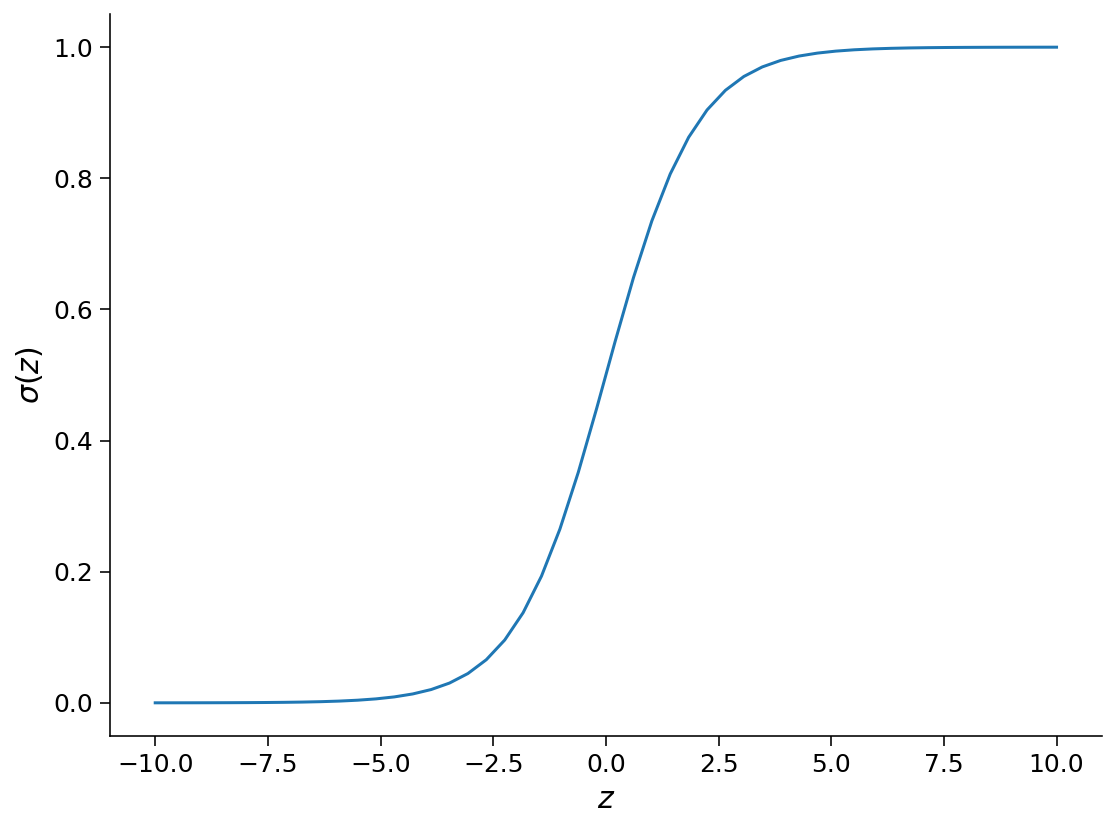

In [8]:
def sigmoid(z):
    """Return the logistic transform of z."""
    ##############################################################################
    # TODO for students: Fill in the missing code (...) and remove the error
    #raise NotImplementedError("Student exercise: implement the sigmoid function")
    ##############################################################################

    sigmoid = 1/(np.exp(-z)+1)

    return sigmoid


# Visualize
plot_function(sigmoid, "\sigma", "z", (-10, 10))



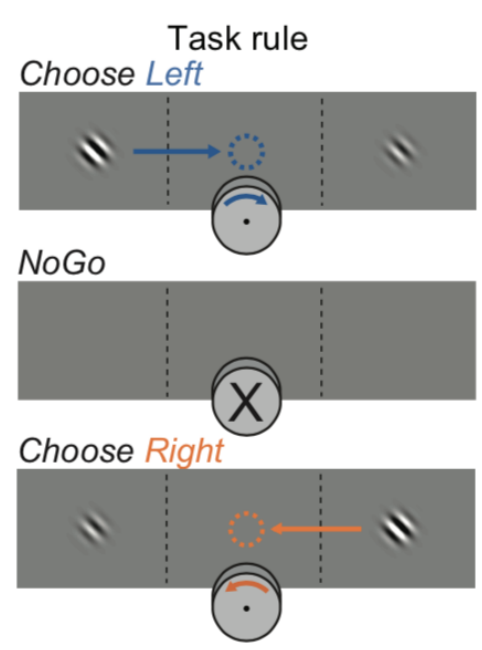

In [9]:
# @markdown Execute to see schematic
import IPython
IPython.display.Image("http://kordinglab.com/images/others/steinmetz-task.png")

In [10]:
data = load_steinmetz_data()
for key, val in data.items():
    print(key, val.shape)

spikes (276, 691)
choices (276,)


In [11]:
y = data["choices"]
X = data["spikes"]

In [13]:
# Define the model
log_reg = LogisticRegression(penalty="none")

# Fit it to data
log_reg.fit(X, y)

LogisticRegression(penalty='none')

In [14]:
y_pred = log_reg.predict(X)

In [21]:
def compute_accuracy(X, y, model):
    """Compute accuracy of classifier predictions.

    Args:
      X (2D array): Data matrix
      y (1D array): Label vector
      model (sklearn estimator): Classifier with trained weights.

    Returns:
      accuracy (float): Proportion of correct predictions.
    """
    #############################################################################
    # TODO Complete the function, then remove the next line to test it
    #raise NotImplementedError("Implement the compute_accuracy function")
    #############################################################################

    y_pred = model.predict(X)

    accuracy = (y==y_pred).mean()

    return accuracy


# Compute train accuracy
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")


Accuracy on the training data: 100.00%


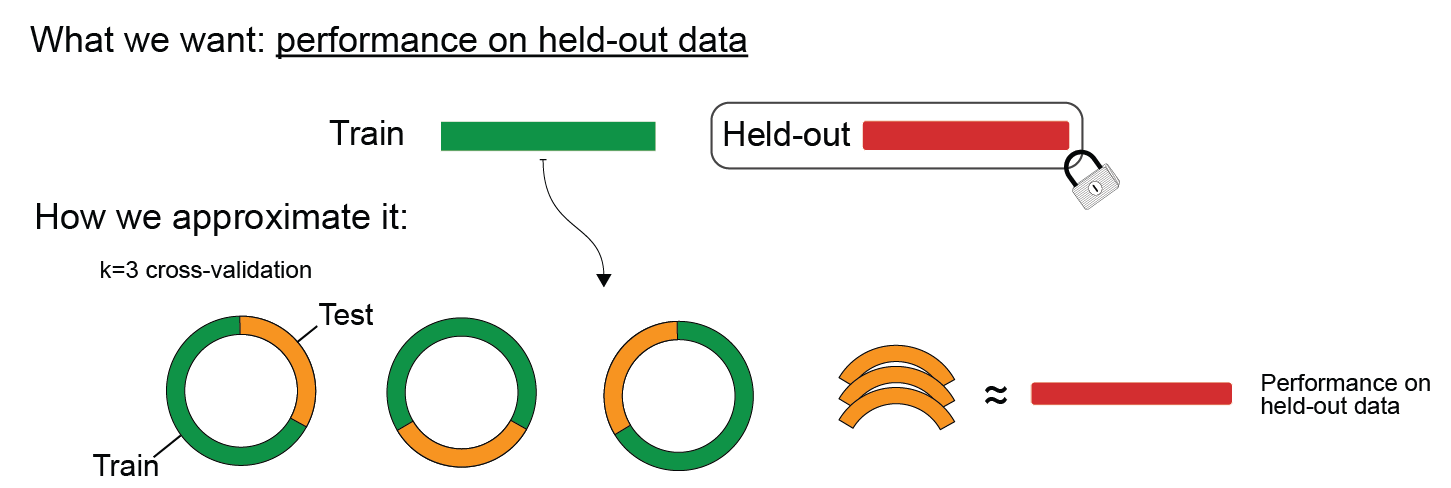

In [22]:
# @markdown Execute to see schematic
import IPython
IPython.display.Image("http://kordinglab.com/images/others/justCV-01.png")

In [23]:
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8)  

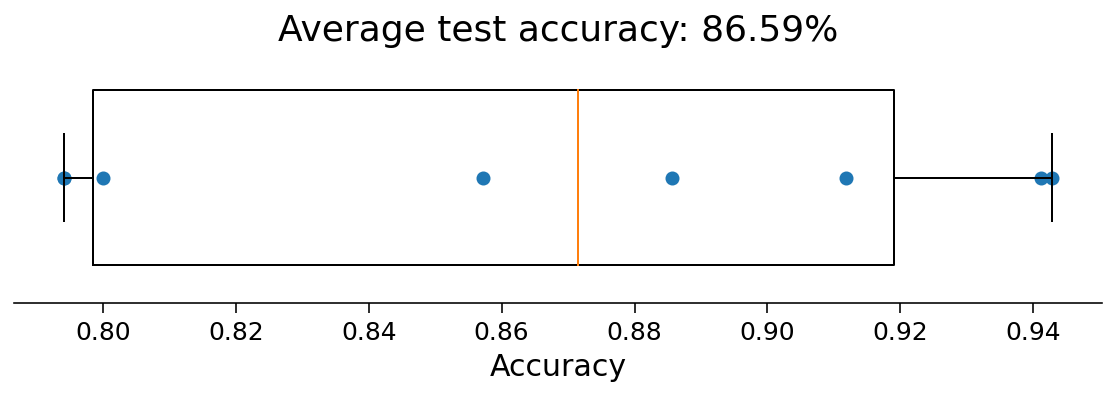

In [24]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

In [ ]:
log_reg = LogisticRegression(penalty="none").fit(X, y)
plot_weights({"No regularization": log_reg})

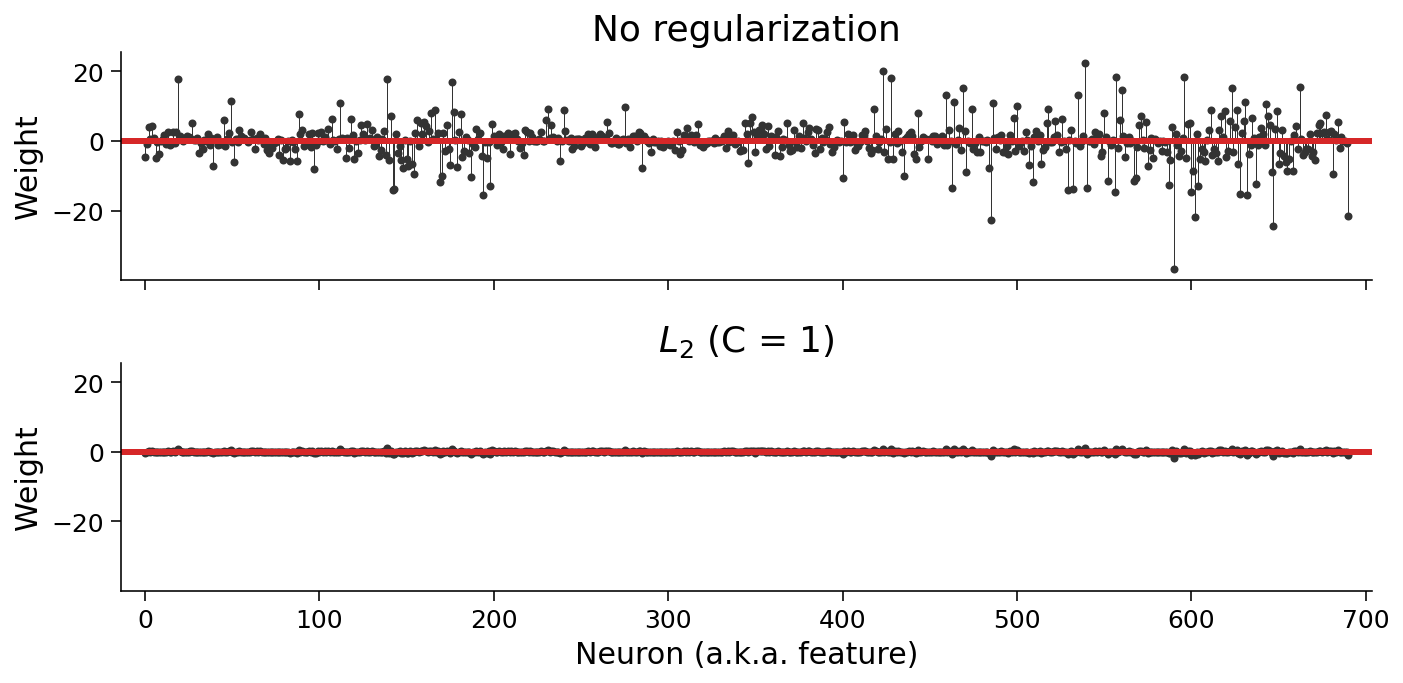

In [25]:
log_reg_l2 = LogisticRegression(penalty="l2", C=1).fit(X, y)

# now show the two models
models = {
  "No regularization": log_reg,
  "$L_2$ (C = 1)": log_reg_l2,
}
plot_weights(models)

In [26]:
# @markdown Execute this cell to enable the widget!

# Precompute the models so the widget is responsive
log_C_steps = 1, 11, 1
penalized_models = {}
for log_C in np.arange(*log_C_steps, dtype=int):
    m = LogisticRegression("l2", C=10 ** log_C, max_iter=5000)
    penalized_models[log_C] = m.fit(X, y)


@widgets.interact
def plot_observed(log_C=widgets.FloatSlider(value=1, min=1, max=10, step=1)):
    models = {
        "No regularization": log_reg,
        f"$L_2$ (C = $10^{log_C}$)": penalized_models[log_C],
    }
    plot_weights(models)


interactive(children=(FloatSlider(value=1.0, description='log_C', max=10.0, min=1.0, step=1.0), Output()), _do…

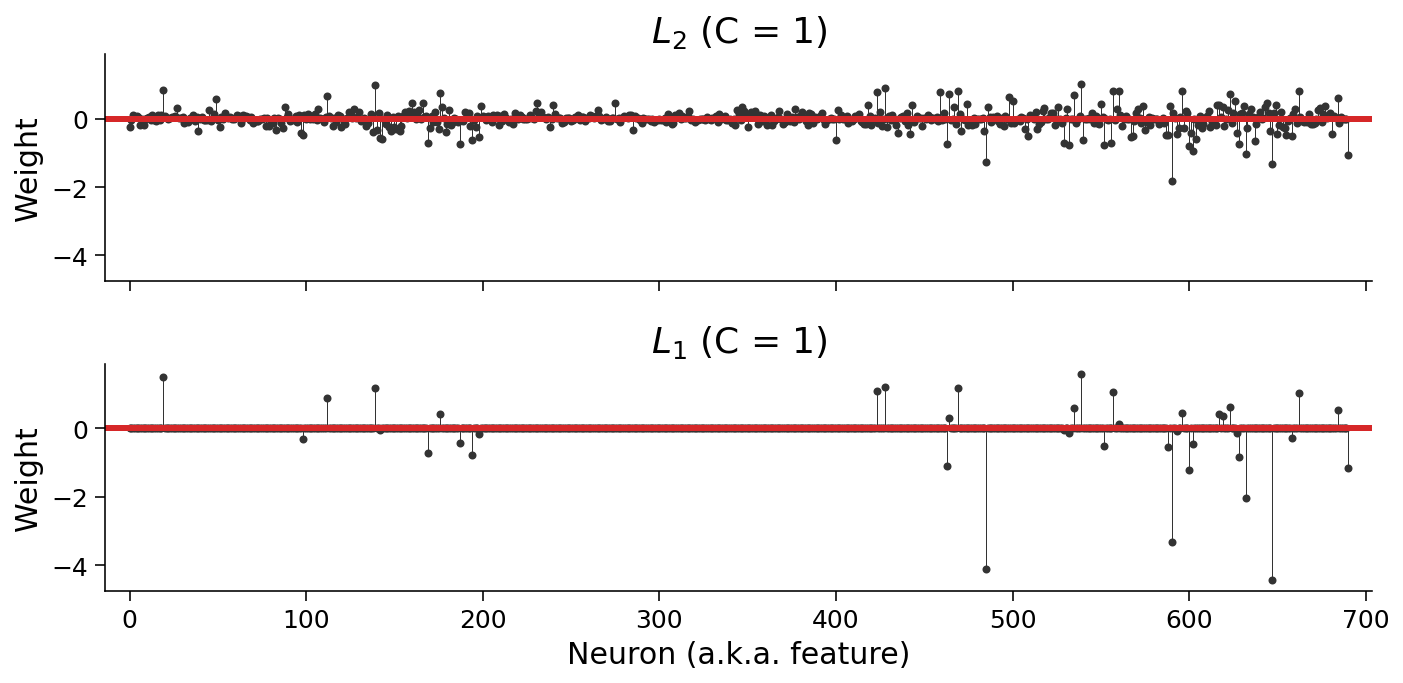

In [27]:
log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000)
log_reg_l1.fit(X, y)
models = {
    "$L_2$ (C = 1)": log_reg_l2,
    "$L_1$ (C = 1)": log_reg_l1,
}
plot_weights(models)

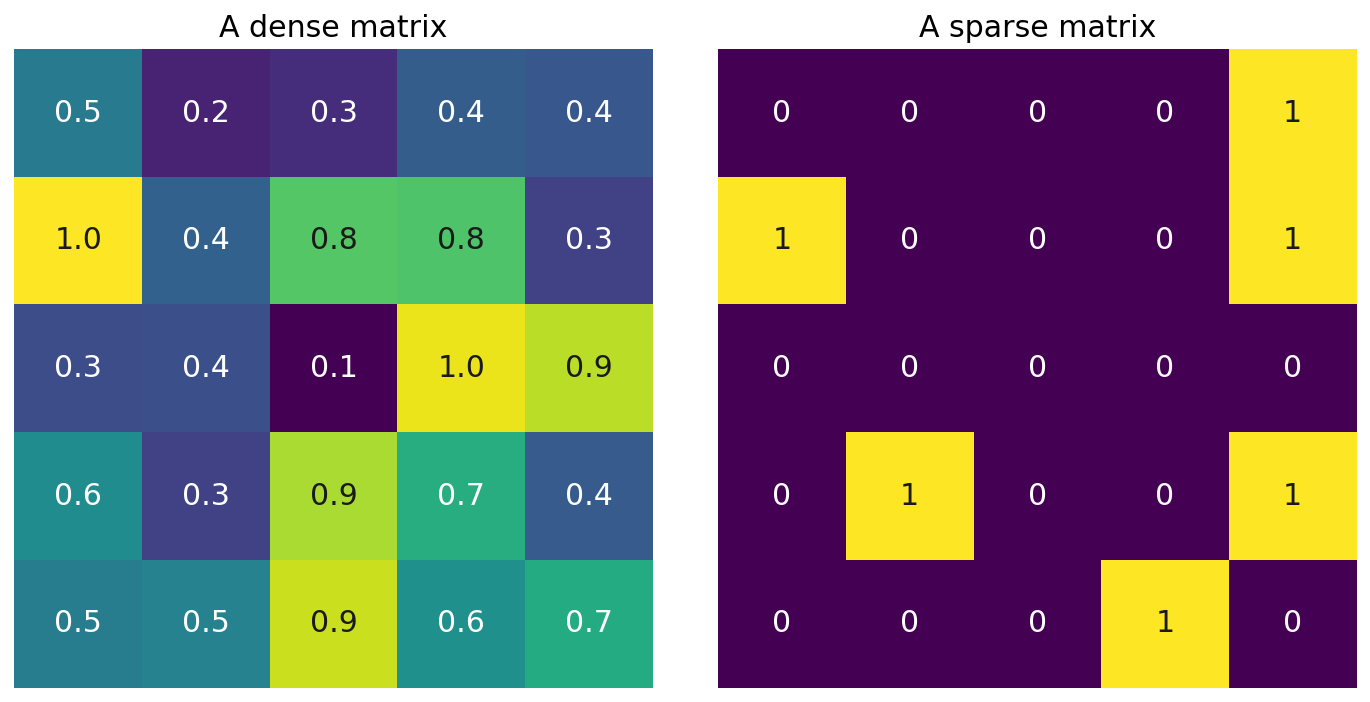

In [28]:
# @markdown Execute to plot a dense and a sparse matrix
np.random.seed(50)
n = 5
M = np.random.random((n, n))
M_sparse = np.random.choice([0, 1], size=(n, n), p=[0.8, 0.2])

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

axs[0].imshow(M)
axs[1].imshow(M_sparse)
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("A dense matrix", fontsize=15)
axs[1].set_title("A sparse matrix", fontsize=15)
text_kws = dict(ha="center", va="center")
for i in range(n):
    for j in range(n):
        iter_parts = axs, [M, M_sparse], ["{:.1f}", "{:d}"]
        for ax, mat, fmt in zip(*iter_parts):
            val = mat[i, j]
            color = ".1" if val > 0.7 else "w"
            ax.text(j, i, fmt.format(val), c=color, **text_kws)


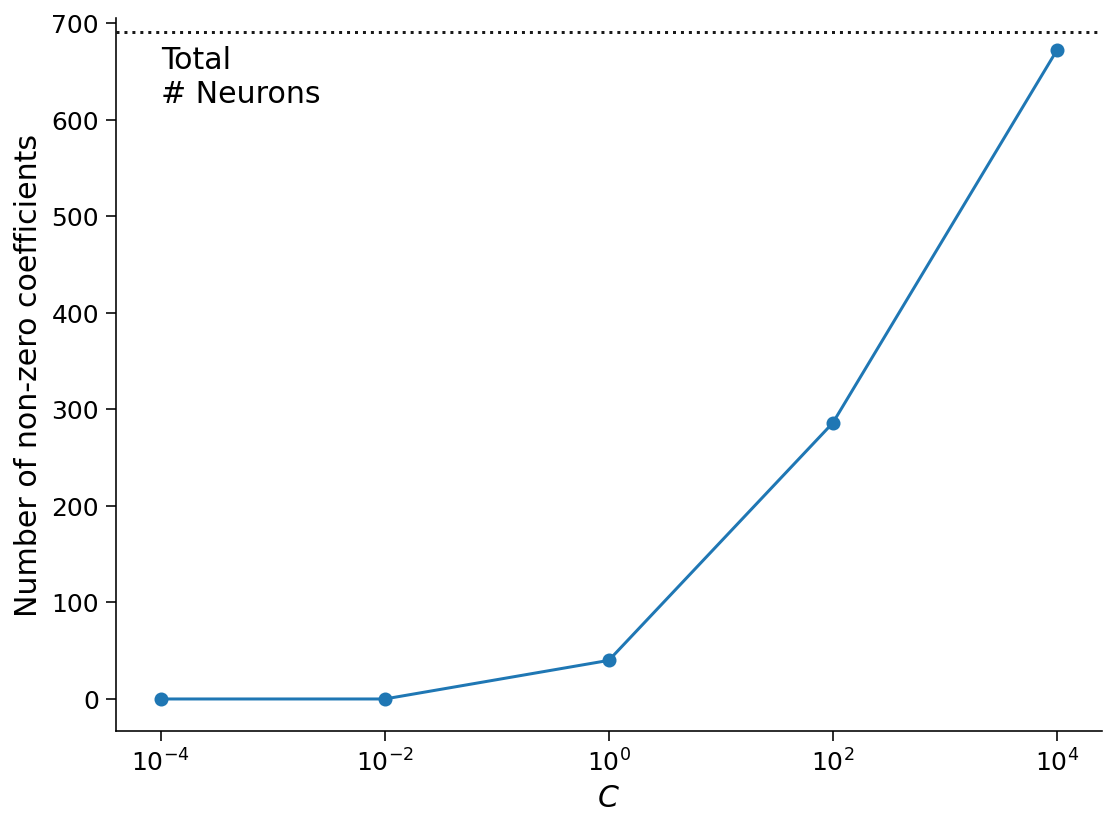

In [45]:
def count_non_zero_coefs(X, y, C_values):
    """Fit models with different L1 penalty values and count non-zero coefficients.

    Args:
      X (2D array): Data matrix
      y (1D array): Label vector
      C_values (1D array): List of hyperparameter values

    Returns:
      non_zero_coefs (list): number of coefficients in each model that are nonzero

    """
    #############################################################################
    # TODO Complete the function and remove the error
    #raise NotImplementedError("Implement the count_non_zero_coefs function")
    #############################################################################

    non_zero_coefs = []
    for C in C_values:

        # Initialize and fit the model
        # (Hint, you may need to set max_iter)
        model = LogisticRegression(max_iter=5000,penalty="l1",C= C, solver='saga' )
        model.fit(X,y)

        # Get the coefs of the fit model (in sklearn, we can do this using model.coef_)
        coefs = model.coef_
        
        # Count the number of non-zero elements in coefs
        non_zero = sum(coefs[0]!=0)
        non_zero_coefs.append(non_zero)

    return non_zero_coefs


# Use log-spaced values for C
C_values = np.logspace(-4, 4, 5)

# Count non zero coefficients
non_zero_l1 = count_non_zero_coefs(X, y, C_values)

# Visualize
plot_non_zero_coefs(C_values, non_zero_l1, n_voxels=X.shape[1])

IndexError: index 30 is out of bounds for axis 0 with size 9

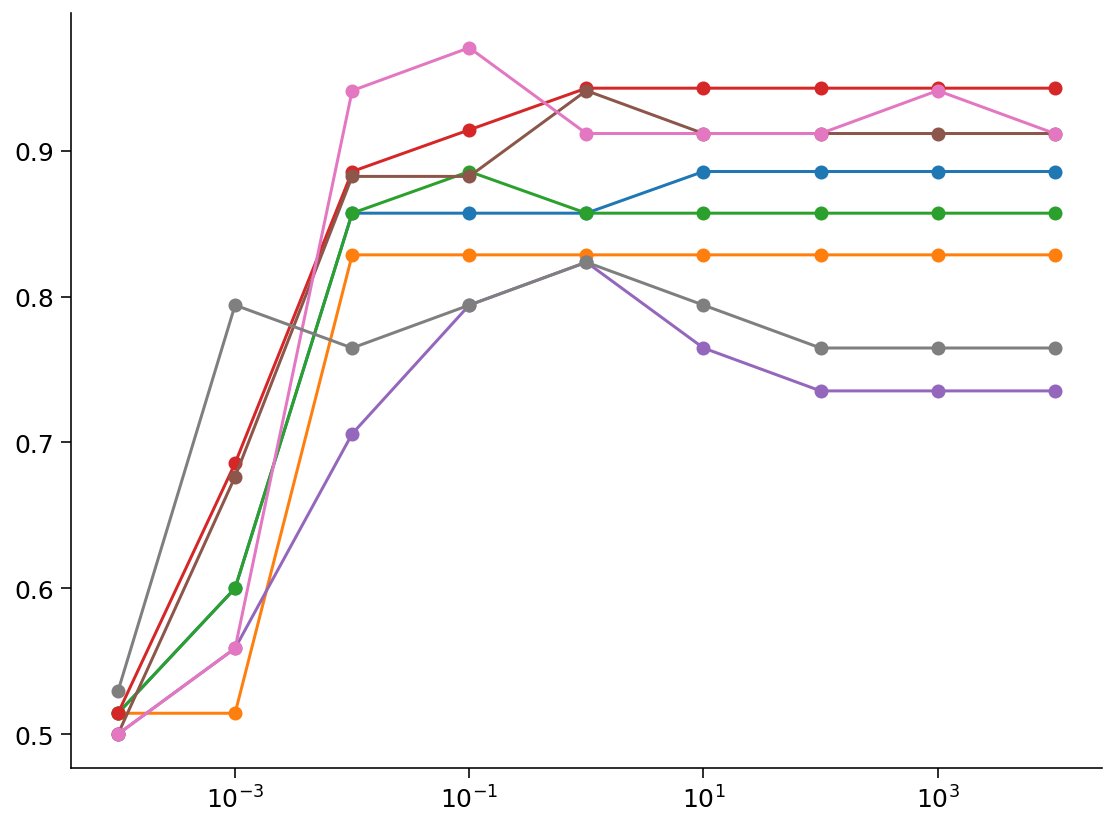

In [48]:
def model_selection(X, y, C_values):
    """Compute CV accuracy for each C value.

    Args:
      X (2D array): Data matrix
      y (1D array): Label vector
      C_values (1D array): Array of hyperparameter values

    Returns:
      accuracies (1D array): CV accuracy with each value of C

    """
    #############################################################################
    # TODO Complete the function and remove the error
    #raise NotImplementedError("Implement the model_selection function")
    #############################################################################

    accuracies = []
    for C in C_values:

        # Initialize and fit the model
        # (Hint, you may need to set max_iter)
        model = LogisticRegression(max_iter=5000,penalty="l2",C= C, solver='saga' )

        # Get the accuracy for each test split using cross-validation
        accs = cross_val_score(model, X, y, cv=8) 
        # Store the average test accuracy for this value of C
        accuracies.append(accs)

    return accuracies


# Use log-spaced values for C
C_values = np.logspace(-4, 4, 9)

# Compute accuracies
accuracies = model_selection(X, y, C_values)

# Visualize
plot_model_selection(C_values, accuracies)